In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


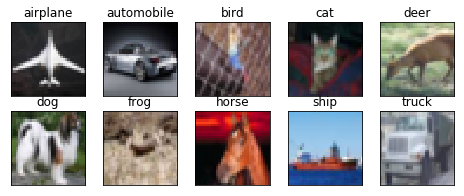

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 16s 41ms/step - loss: 1.9282 - acc: 0.2539 - val_loss: 1.5322 - val_acc: 0.4122
Epoch 2/50
390/390 [==============================] - 9s 23ms/step - loss: 1.4296 - acc: 0.4704 - val_loss: 1.2073 - val_acc: 0.5574
Epoch 3/50
390/390 [==============================] - 9s 22ms/step - loss: 1.1900 - acc: 0.5758 - val_loss: 1.0404 - val_acc: 0.6242
Epoch 4/50
390/390 [==============================] - 9s 23ms/step - loss: 1.0286 - acc: 0.6413 - val_loss: 0.9131 - val_acc: 0.6839
Epoch 5/50
390/390 [==============================] - 9s 23ms/step - loss: 0.9189 - acc: 0.6815 - val_loss: 0.7873 - val_acc: 0.7276
Epoch 6/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8391 - acc: 0.7141 - val_loss: 0.7857 - val_acc: 0.7306
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.7888 - acc: 0.7302 - val_loss: 0.7897 - val_acc: 0.7347
Epoch 8/50
390/390 [==============================] - 9s 23ms/step -

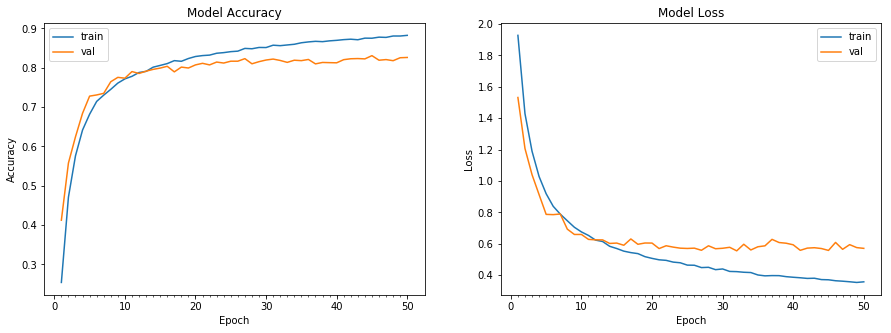

Accuracy on test data is: 82.59


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

<h3>Trained Above Network on 100 epochs</h3>

In [0]:
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_16 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 10s 26ms/step - loss: 1.8789 - acc: 0.2835 - val_loss: 1.4466 - val_acc: 0.4567
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3613 - acc: 0.5022 - val_loss: 1.1356 - val_acc: 0.5888
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1442 - acc: 0.5933 - val_loss: 0.9838 - val_acc: 0.6543
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9966 - acc: 0.6496 - val_loss: 0.8757 - val_acc: 0.6926
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8867 - acc: 0.6907 - val_loss: 0.7984 - val_acc: 0.7218
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8166 - acc: 0.7196 - val_loss: 0.7719 - val_acc: 0.7297
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7538 - acc: 0.7418 - val_loss: 0.7587 - val_acc: 0.7362
Epoch 8/100
390/390 [==============================] - 9s 23m

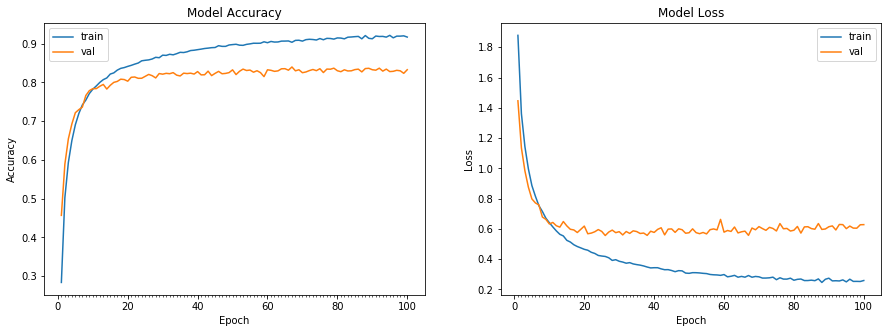

Accuracy on test data is: 83.28


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Base Accuracy - 83.28

Below is the Observation just after removing dense layer - their was slight increase in accuracy earlier itself.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 9s 24ms/step - loss: 1.6760 - acc: 0.3755 - val_loss: 1.2899 - val_acc: 0.5342
Epoch 2/100
390/390 [==============================] - 9s 22ms/step - loss: 1.1849 - acc: 0.5776 - val_loss: 1.0298 - val_acc: 0.6347
Epoch 3/100
390/390 [==============================] - 9s 22ms/step - loss: 0.9866 - acc: 0.6514 - val_loss: 0.8982 - val_acc: 0.6871
Epoch 4/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8462 - acc: 0.7016 - val_loss: 0.7689 - val_acc: 0.7301
Epoch 5/100
390/390 [==============================] - 9s 22ms/step - loss: 0.7505 - acc: 0.7371 - val_loss: 0.7096 - val_acc: 0.7536
Epoch 6/100
390/390 [==============================] - 9s 22ms/step - loss: 0.6733 - acc: 0.7647 - val_loss: 0.6556 - val_acc: 0.7711
Epoch 7/100
390/390 [==============================] - 9s 22ms/step - loss: 0.6148 - acc: 0.7833 - val_loss: 0.6327 - val_acc: 0.7849
Epoch 8/100
390/390 [==============================] - 9s 22ms

KeyboardInterrupt: ignored

<h3>Modified Network with respect to below points</h3>
<br>remove dense
<br>add layers required to reach RF
<br>see if all dropouts are properly placed
<br>follow the guidelines we discussed in the class
<br>Get accuracy more than the base accuracy in less number 100 epochs. Hint, you might want to use "border_mode='same',"


In [0]:
model = Sequential()                                                            # Image size - RF #border same  - padding which maintains the size of image as same after conv as well. 
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))# 32 - 3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3,border_mode='same'))                                             #32 - 5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))                                      #16 - 10
model.add(Convolution2D(48, 1, 1, activation='relu'))
model.add(Convolution2D(48, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))                         #16 - 12
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3,border_mode='same'))                                             #16 - 14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(48, 1, 1, activation='relu'))                         #8 - 28
model.add(Dropout(0.25))
model.add(Convolution2D(48, 3, 3, border_mode='same'))                        #6 - 32
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(Convolution2D(92,4,4,border_mode='same'))                           #4 - 34
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Activation('relu'))
#model.add(Dropout(0.25))
model.add(Convolution2D(192, 1, 1, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))                                      
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(512)) - Removed dense layers
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(256))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Activation('softmax'))
model.add(Dense(num_classes, activation='softmax'))
#model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/i

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 96)        41568     
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 96)        384       
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 96)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=90)`
  if sys.path[0] == '':


Epoch 1/90
390/390 [==============================] - 24s 62ms/step - loss: 1.4497 - acc: 0.4716 - val_loss: 1.8309 - val_acc: 0.3605
Epoch 2/90
390/390 [==============================] - 22s 57ms/step - loss: 1.0148 - acc: 0.6392 - val_loss: 1.1479 - val_acc: 0.6045
Epoch 3/90
390/390 [==============================] - 22s 57ms/step - loss: 0.8522 - acc: 0.6980 - val_loss: 0.8614 - val_acc: 0.6990
Epoch 4/90
390/390 [==============================] - 22s 57ms/step - loss: 0.7431 - acc: 0.7390 - val_loss: 0.8868 - val_acc: 0.6871
Epoch 5/90
390/390 [==============================] - 22s 57ms/step - loss: 0.6700 - acc: 0.7646 - val_loss: 1.0277 - val_acc: 0.6348
Epoch 6/90
390/390 [==============================] - 22s 57ms/step - loss: 0.6238 - acc: 0.7798 - val_loss: 0.8048 - val_acc: 0.7165
Epoch 7/90
390/390 [==============================] - 22s 57ms/step - loss: 0.5749 - acc: 0.7986 - val_loss: 0.7219 - val_acc: 0.7438
Epoch 8/90
390/390 [==============================] - 22s 57ms

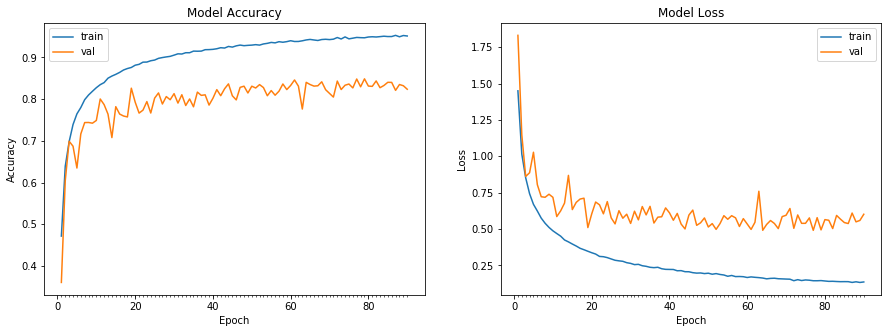

Accuracy on test data is: 82.37


In [18]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 90, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Got Val acc - 84.82 at 77th epoch which beats base acc - 83.28.